In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/main/day36-imputing-numerical-data/titanic_toy.csv")

In [3]:
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   Fare      846 non-null    float64
 2   Family    891 non-null    int64  
 3   Survived  891 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 28.0 KB


In [5]:
df.isnull().mean()

Age         0.198653
Fare        0.050505
Family      0.000000
Survived    0.000000
dtype: float64

## Approaching Using Pandas

In [6]:
X = df.drop(columns = "Survived")
y = df['Survived']

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

In [8]:
X_train.shape, X_test.shape

((712, 3), (179, 3))

In [9]:
X_train.isnull().mean()

Age       0.207865
Fare      0.050562
Family    0.000000
dtype: float64

In [10]:
mean_age = X_train['Age'].mean()
median_age = X_train['Age'].median()

mean_fare = X_train['Fare'].mean()
median_fare = X_train['Fare'].median()

In [11]:
X_train['Age_median'] = X_train['Age'].fillna((median_age))
X_train['Age_mean'] = X_train['Age'].fillna((mean_age))

X_train['Fare_median'] = X_train['Fare'].fillna(median_fare)
X_train['Fare_mean'] = X_train['Fare'].fillna(mean_fare)

X_train.sample(10)

C:\Users\baibh\AppData\Local\Temp/ipykernel_21272/2441861325.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['Age_median'] = X_train['Age'].fillna((median_age))
C:\Users\baibh\AppData\Local\Temp/ipykernel_21272/2441861325.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['Age_mean'] = X_train['Age'].fillna((mean_age))
C:\Users\baibh\AppData\Local\Temp/ipykernel_21272/2441861325.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

,Age,Fare,Family,Age_median,Age_mean,Fare_median,Fare_mean
259,50.0,NaN,1,50.00,50.000000,14.4583,32.617597
254,41.0,20.2125,2,41.00,41.000000,20.2125,20.212500
599,49.0,56.9292,1,49.00,49.000000,56.9292,56.929200
234,24.0,10.5000,0,24.00,24.000000,10.5000,10.500000
805,31.0,7.7750,0,31.00,31.000000,7.7750,7.775000
507,NaN,26.5500,0,28.75,29.785904,26.5500,26.550000
407,3.0,18.7500,2,3.00,3.000000,18.7500,18.750000
855,18.0,9.3500,1,18.00,18.000000,9.3500,9.350000
330,NaN,23.2500,2,28.75,29.785904,23.2500,23.250000
235,NaN,7.5500,0,28.75,29.785904,7.5500,7.550000


In [12]:
print('The original Age Variance is' , X_train['Age'].var())
print('The mean Age Variance is', X_train['Age_mean'].var())
print('The median Age Variance is', X_train['Age_median'].var())

print('The original Fare Variance is' , X_train['Fare'].var())
print('The mean Fare Variance is', X_train['Fare_mean'].var())
print('The median Fare Variance is', X_train['Fare_median'].var())


The original Age Variance is 204.3495133904614
The mean Age Variance is 161.81262452718673
The median Age Variance is 161.9895663346054
The original Fare Variance is 2448.197913706318
The mean Fare Variance is 2324.2385256705547
The median Fare Variance is 2340.0910219753637


# Plotting the chaange in distributionns 

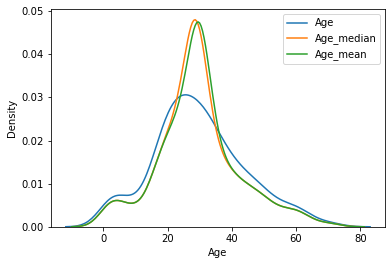

In [13]:
sns.kdeplot(X_train['Age'], label = 'Age')
sns.kdeplot(X_train['Age_median'], label = 'Age_median')
sns.kdeplot(X_train['Age_mean'], label = 'Age_mean')
plt.legend()
plt.show()

This shows some major difference in the curves thus the use of median and mean to replace the values in the Age column thus it doesn't make sense.
Since age has 20% missing data thus the use of mean and median thus not make any  sense while imputing the missing values


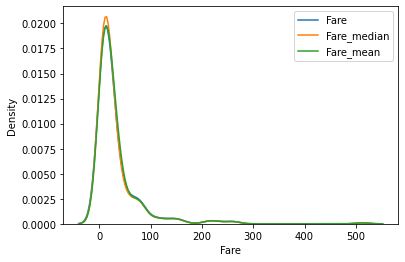

In [14]:
sns.kdeplot(X_train['Fare'], label = 'Fare')
sns.kdeplot(X_train['Fare_median'], label = 'Fare_median')
sns.kdeplot(X_train['Fare_mean'], label = 'Fare_mean')
plt.legend()
plt.show()

Since the graph overlaps in this thus replacing missing values with mean and median makes sense.

Since, the data is missing is random with less than 5% thus we can use mean and median for imputing the missing variables.

In [15]:
X_train.cov()

,Age,Fare,Family,Age_median,Age_mean,Fare_median,Fare_mean
Age,204.349513,70.719262,-6.498901,204.349513,204.349513,64.858859,66.665205
Fare,70.719262,2448.197914,17.258917,57.957599,55.603719,2448.197914,2448.197914
Family,-6.498901,17.258917,2.735252,-5.112563,-5.146106,16.476305,16.385048
Age_median,204.349513,57.957599,-5.112563,161.989566,161.812625,53.553455,55.023037
Age_mean,204.349513,55.603719,-5.146106,161.812625,161.812625,51.358000,52.788341
Fare_median,64.858859,2448.197914,16.476305,53.553455,51.358000,2340.091022,2324.238526
Fare_mean,66.665205,2448.197914,16.385048,55.023037,52.788341,2324.238526,2324.238526


In [16]:
X_train.corr()

,Age,Fare,Family,Age_median,Age_mean,Fare_median,Fare_mean
Age,1.000000,0.092644,-0.299113,1.000000,1.000000,0.087356,0.090156
Fare,0.092644,1.000000,0.208268,0.091757,0.088069,1.000000,1.000000
Family,-0.299113,0.208268,1.000000,-0.242883,-0.244610,0.205942,0.205499
Age_median,1.000000,0.091757,-0.242883,1.000000,0.999454,0.086982,0.089673
Age_mean,1.000000,0.088069,-0.244610,0.999454,1.000000,0.083461,0.086078
Fare_median,0.087356,1.000000,0.205942,0.086982,0.083461,1.000000,0.996607
Fare_mean,0.090156,1.000000,0.205499,0.089673,0.086078,0.996607,1.000000


<AxesSubplot:>

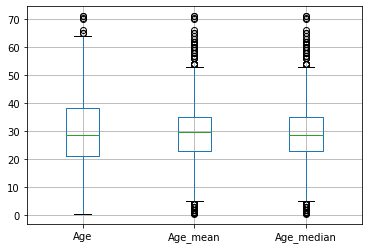

In [17]:
fig = plt.figure()
X_train[['Age', 'Age_mean', 'Age_median']].boxplot()

<AxesSubplot:>

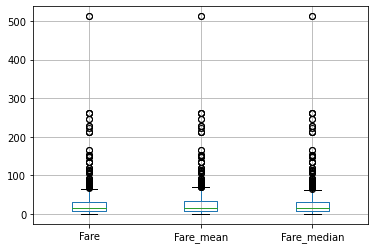

In [18]:
X_train[['Fare', 'Fare_mean', 'Fare_median']].boxplot()

# Using Scikit Learn for mean, median imputing

In [19]:
from sklearn.impute import SimpleImputer

In [20]:
imputer1 = SimpleImputer(strategy = 'median')
imputer2 = SimpleImputer(strategy = 'mean')

In [21]:
from sklearn.compose import ColumnTransformer

In [22]:
trf = ColumnTransformer([
    ('imputer1', imputer1, ['Age']),
    ('imputer2', imputer2, ['Fare'])], remainder = 'passthrough')

In [23]:
trf.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1', SimpleImputer(strategy='median'),
                                 ['Age']),
                                ('imputer2', SimpleImputer(), ['Fare'])])

In [24]:
X_train_transformed = trf.transform(X_train)

In [27]:
X_train_df = pd.DataFrame(X_train_transformed, columns = X_train.columns)

In [29]:
X_train_df.isnull().sum()

Age            0
Fare           0
Family         0
Age_median     0
Age_mean       0
Fare_median    0
Fare_mean      0
dtype: int64